# Feur_Dashboard


In [1]:
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import ttk
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [19]:
import sys
!{sys.executable} --version

Python 3.9.13


In [2]:
filename = "Commandes_clients.csv"
df = pd.read_csv(filename)

print(df.head(10))

   IdCommande  IdClient  IdProduit  Date  Quantite
0           1         8          1  1995       225
1           2        14          1  1995       125
2           3        11          9  1995       150
3           4        11          5  1996        25
4           5        11         10  1996       175
5           6         9          8  1996       125
6           7         7          3  1996       250
7           8        12          8  1996       150
8           9        13          3  1996       200
9          10         8          1  1996       200


In [3]:
filename = "Remises.csv"
df_remises = pd.read_csv(filename)
print(df_remises.head(34))

    Remise  IdProduit  IdClient
0        6         10         1
1        4          8        14
2       15          3        11
3       22          5        14
4       12          2         5
5        1          7        11
6       14          9        12
7        5          1         5
8        1          2         9
9       10          1        11
10       9          6         5
11      17          2         6
12      21          2         5
13       2          6         3
14       6          7        13
15       3          8        12
16       2          8        14
17       1          3         2
18       4          5         6
19      14          9         5
20      19          9         7
21       2          8         7
22       5          2        10
23       7          6        11
24       4          2         1
25      19          9         8
26      20          5         7
27      18          9        15
28       9          5        15


In [4]:
filename = "Produits.csv"
df_produit = pd.read_csv(filename)
print(df_produit.head(12))

   Prix  Marge             Nom
0    53     29        Teinture
1    30     30         Ciseaux
2    70     25   Seche_cheveux
3    10     40       Shampoing
4    27     23      Extensions
5    12      9             Gel
6    17      6           Laque
7     5      4           Gants
8    15     20          Brosse
9   750     20  Casque_sechage


In [5]:
filename = "Clients.csv"
df_client = pd.read_csv(filename, encoding='utf-8')
print(df_client)

                    Nom
0            Attrac'tif
1        Communaut'hair
2         Quoi ? Feur !
3              Rela'tif
4           Superla'tif
5            Pendan'tif
6         Helicopt'hair
7             Prec'hair
8          Boulang'hair
9         Poissoni'hair
10     Perpendicul'hair
11            Calc'hair
12  L'atelier du cheveu
13          Centen'hair
14             Addi'tif


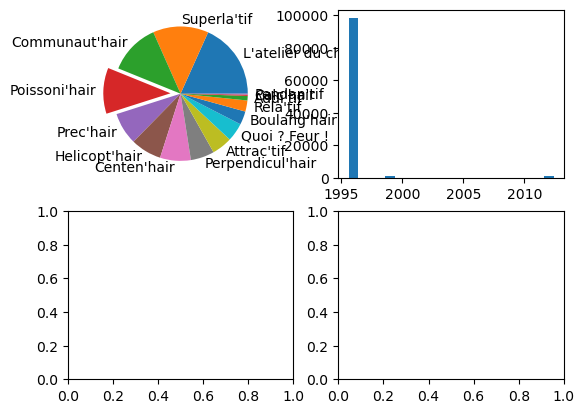

In [17]:
cost = [df["Quantite"][i]*df_produit["Prix"][df["IdProduit"][i]-1] for i in df.index]

df["Cost"] = cost

df_importance = df.groupby(["IdClient"]).sum().sort_values(by="Cost", ascending=False)


NomClient_importance = [df_client["Nom"][i-1] for i in list(df_importance.index)]
df_importance["Nom"] = NomClient_importance





#def de la fonction qui récupère l'élément selectionné
def action(ev):
    
    select = listeCombo.get()
    idselect = list(df_client["Nom"]).index(select)
    
    #instanciation des df pour les utiliser dans l'affichage des remises actuelles
    df_remisesClient = df_remises[df_remises["IdClient"]==idselect]
    
    texteRemisesActu=StringVar()
    texteRemiseTrouvee=StringVar()
    texteRemiseAAppliquer=StringVar()
   
    

    #ecriture dans la fenetre tkinter1
    #ecriture des labels d'information pour le client selectionne
    texteLabel = tk.Label(root,text= "Pour le client " + str(df_client["Nom"][idselect]) + ":")
    texteLabel.pack()
    
    #df_remisesClient["IdProduit"][i],
    if list(df_remisesClient.index):
        for i in list(df_remisesClient.index):
            texteRemisesActu.set("Remise actuelle de {}% sur le produit nommé {}".format(df_remisesClient["Remise"][i],df_produit["Nom"][df_remisesClient["IdProduit"][i]]))
    else:
        texteRemisesActu.set("Pas de remise pour ce client")
        
    remiseLabel = tk.Label(root, textvariable= texteRemisesActu)
    remiseLabel.pack()
    
    
    #gestion de la fenetre tkinter2
    root2 = tk.Tk()
    fig, axis = plt.subplots(2,2)
    
    
    #pie chart
    total = df["Cost"].sum()
    explosion = [0] * df_importance.shape[0]
    explosion[list(df_importance.index).index(idselect+1)] = 0.15
    camLabel = []
    for i in list(df_importance.index):
        camLabel.append(df_client["Nom"][i-1])
    axis[0,0].pie(df_importance["Cost"], labels = camLabel, explode = explosion)
    
    
    #histogramme
    df_graphclient = df[df["IdClient"]==idselect]
    df_histo = df_graphclient.groupby(["Date"]).sum().sort_values(by="Date", ascending=True)
    axis[0,1].bar(height = df_histo["Cost"], x = list(df_histo.index))
    
    best = [-1, -1]
    score_max = 0

    df_clientPProduit = df_graphclient.groupby(["IdProduit"]).sum()

    for i in list(df_graphclient.index):
        if not(df_graphclient["IdProduit"][i] in list(df_remisesClient["IdProduit"])):
            margeP = df_produit["Marge"][df_graphclient["IdProduit"][i]-1]
            qteP = df_clientPProduit["Quantite"][df_graphclient["IdProduit"][i]]
            prixP = df_produit["Prix"][df_graphclient["IdProduit"][i]-1]
            score = margeP * qteP * prixP
            if score > score_max:
                score_max = score
                propRemise = rd.randint(1, int(df_produit["Marge"][df_graphclient["IdProduit"][i]-1])-1)
                best = [df_graphclient["IdProduit"][i], propRemise]

    if score_max != 0:
        texteRemiseTrouvee.set("Remise avantageuse détectée !")
        texteRemiseAAppliquer.set("Conseil : accordez {}% de remise au client {} sur le produit n°{} ({}), afin de le fidéliser !".format(best[1], df_client["Nom"][idselect], best[0], df_produit["Nom"][best[0]-1]))
    else:
        texteRemiseAAppliquer.set("Pas de remise suggérée... :(")
    
    remiseLabelFound = tk.Label(root, textvariable= texteRemiseTrouvee)
    remiseLabelFound.pack()
    remiseLabelFound2 = tk.Label(root, textvariable= texteRemiseAAppliquer)
    remiseLabelFound2.pack()
    
    #dessin du canva
    canvas = FigureCanvasTkAgg(fig,master=root2)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    tk.mainloop()

#creation de la combobox
root = tk.Tk()
root.geometry('600x500')

choixLabel = tk.Label(root, text = "Veuillez choisir un client !")

choixLabel.pack()
#ajout de la liste des clients dans la combobox 
listeCombo = ttk.Combobox(root, values=NomClient_importance)

listeCombo.current(0)

listeCombo.pack()
listeCombo.bind("<<ComboboxSelected>>",action)

root.mainloop()